<div style="display: flex; background-color: RGB(255,114,0);" >
<h1 style="margin: auto; padding: 30px; ">Brief Cyber detective</h1>
</div>


In [169]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import pandas as pd
pd.reset_option('display.max_colwidth')
from nltk.sentiment import SentimentIntensityAnalyzer

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('all')
from nltk.corpus import stopwords
from nltk import FreqDist
from nltk.util import ngrams

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1 : Analyse des livres </h3>
</div>

In [53]:
df = pd.read_csv('df_books.csv')
df.head()

,id,title,stars,prices,instock
0,0,A Light in the Attic,3,51.77,In stock
1,1,Tipping the Velvet,1,53.74,In stock
2,2,Soumission,1,50.10,In stock
3,3,Sharp Objects,4,47.82,In stock
4,4,Sapiens: A Brief History of Humankind,5,54.23,In stock


In [54]:
df.corr()

,id,stars,prices
id,1.000000,-0.014017,0.016563
stars,-0.014017,1.000000,0.028166
prices,0.016563,0.028166,1.000000


Nous remarquons que les données sont réparties aleatoirement et qu'il n'y pas de corrélation entre les avis (stars) ainsi que le prix

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2 - Analyse du livre "The Art of war"</h3>
</div>

In [55]:
df_art = pd.read_csv('twitter/the_Art_of_War.csv', delimiter="|")
df_art.to_csv('datasets/The_Art_of_War.csv')
df_art

,id,url,date,renderedContent,hashtags,replyCount,retweetCount,likeCount
0,1610264281215369216,https://twitter.com/EduG2k/status/161026428121...,2023-01-03 13:18:16+00:00,@archer_kwaku Abi he no dey social media so we...,NaN,1,0,0
1,1610260928687218695,https://twitter.com/SunTzuSoccer/status/161026...,2023-01-03 13:04:57+00:00,@msceducation “Everyone will be able to see ho...,NaN,0,0,0
2,1610260894956810241,https://twitter.com/ArtofWarBot/status/1610260...,2023-01-03 13:04:49+00:00,"In the practical art of war, the best thing of...",NaN,0,1,0
3,1610260739641729025,https://twitter.com/pr0m37h3um/status/16102607...,2023-01-03 13:04:12+00:00,every dude (including girls) has had a point i...,NaN,1,0,0
4,1610260185536430082,https://twitter.com/bramiozo/status/1610260185...,2023-01-03 13:02:00+00:00,@lexfridman A lot of the books I see require d...,NaN,0,0,0
...,...,...,...,...,...,...,...,...
4995,1601930534757744641,https://twitter.com/YoDisasta/status/160193053...,2022-12-11 13:22:56+00:00,"🌟\n\n""The Art of War"" \n\nyoutube.com/shorts/s...",NaN,0,0,1
4996,1601929947639345153,https://twitter.com/BooksAndNote/status/160192...,2022-12-11 13:20:36+00:00,The Art of War by Sun Tzu.\n\nKnow when to fig...,NaN,1,0,3
4997,1601922709239496704,https://twitter.com/NeetiInfi/status/160192270...,2022-12-11 12:51:50+00:00,If Hindus really want to revive their ancient ...,NaN,1,2,7
4998,1601920861300301832,https://twitter.com/Pairvin522/status/16019208...,2022-12-11 12:44:30+00:00,"@NigelHe02120796 @2Brushie Sir, I don’t know o...",NaN,0,0,0


In [160]:
df_art["renderedContent"] = df_art["renderedContent"].str.replace(r'@\S*', '', regex=True)
df_art["renderedContent"] = df_art["renderedContent"].str.replace('"', '', regex=True)
df_art["renderedContent"] = df_art["renderedContent"].str.replace('“', '', regex=True)
df_art["renderedContent"] = df_art["renderedContent"].str.replace(r'[^\w\s]', '',regex=True)
df_art["renderedContent"] = df_art["renderedContent"].str.replace('\n', '', regex=True)
df_art["renderedContent"] = df_art["renderedContent"].str.replace('🌟', '', regex=True)
df_art["renderedContent"] = df_art["renderedContent"].str.replace('!', '', regex=True)
df_art["renderedContent"] = df_art["renderedContent"].str.replace('https', '', regex=True)
df_art["renderedContent"] = df_art["renderedContent"].str.strip()
df_art["renderedContent"] = df_art["renderedContent"].str.lower()
df_art["renderedContent"] = df_art["renderedContent"].str.capitalize()
df_art["renderedContent"]

0       Abi he no dey social media so we for find some...
1       Everyone will be able to see how the game is w...
2       In the practical art of war the best thing of ...
3       Every dude including girls has had a point in ...
4       A lot of the books i see require deep thinking...
                              ...                        
4995               The art of war youtubecomshortssyj7m1a
4996    The art of war by sun tzuknow when to fight an...
4997    If hindus really want to revive their ancient ...
4998    Sir i dont know of the wipe spread corruption ...
4999                                       The art of war
Name: renderedContent, Length: 5000, dtype: object

In [113]:
nl = stopwords.words('english')
word = list(STOPWORDS)

def iow(dataframe, wordlist):

    stopwords = set(nl + word + wordlist)
    
    comment_words = ''
    # iterate through the csv file
    for val in dataframe.renderedContent.values:
        
        # typecaste each val to string
        val = str(val)

        # split the value
        tokens = val.split()

        # Converts each token into lowercase
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()

        comment_words += " ".join(tokens)+" "
 
    wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='black',
                    stopwords = stopwords,
                    min_font_size = 10).generate(comment_words)

    # plot the WordCloud image                      
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)

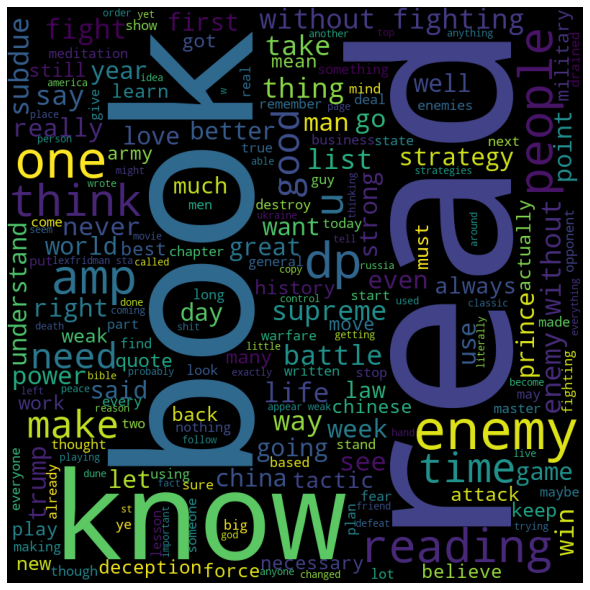

In [157]:
iow(df_art, ["https","art","war","twitter","nan","statu","status","00'","sun","tzu","co","lol"])

Nous remarquons que les mots revenant le plus sur le thème du livres sont :
- fighting
- battle
- force
- attack
- win

cela tourne beaucoup autour du combat

In [79]:
def get_n_grams(tokens):
    """
    Affiche les bigrammes et trigrammes les plus courants dans les données,
    triés par fréquence
    """

    bgs = nltk.bigrams(tokens)
    tgs = nltk.trigrams(tokens)

    n_grams = nltk.FreqDist(bgs).items() | nltk.FreqDist(tgs).items()
    n_grams_df = pd.DataFrame(n_grams, columns=["words sequences", "frequencies"])
    n_grams_df.sort_values(by=["frequencies"], ascending=False, inplace=True)
    print(n_grams_df.head(50))

In [127]:
stop_words = ["https","art","war","twitter","nan","statu","status","00'","sun","the","of","war","tzu"] + nl + word
wl_df_art = list(df_art.renderedContent)
text_art = ''.join(map(str, wl_df_art))
tweets = text_art.lower().split()
tweets_words = [t for t in tweets if t not in stop_words]
get_n_grams(tweets_words)

                     words sequences  frequencies
50631               (enemy, without)          127
18363                (subdue, enemy)          122
103144      (subdue, enemy, without)          119
71507              (supreme, subdue)          119
87486       (supreme, subdue, enemy)          116
25368                     (48, laws)           41
11562                      (-, tzu,)           39
13926                   (read, war.)           33
89454                     (old, man)           32
40908           (without, fighting.)           31
39862                  (know, enemy)           30
76690                   (read, war,)           30
1568                       (tao, te)           29
35649               (complete, text)           28
103977                 (never, read)           28
107493   (enemy, without, fighting.)           27
2905                  (goddamn, it,)           27
40366                 (tzu,, warthe)           26
51409           ((deluxe, hardbound)           25


In [173]:
sia = SentimentIntensityAnalyzer()
sia.polarity_scores(text_art)

{'neg': 0.234, 'neu': 0.664, 'pos': 0.102, 'compound': -1.0}

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">3 - Analyse du livre "The Song of Achilles"</h3>
</div>

In [81]:
df_achilles = pd.read_csv('twitter/achilles.csv', delimiter="|")

In [150]:
df_achilles.head()

,id,url,date,renderedContent,hashtags,replyCount,retweetCount,likeCount
0,1607380521902014465,https://twitter.com/nonecosimale/status/160738...,2022-12-26 14:19:14+00:00,"@BRlVlDI the way I thought ""the song of Achill...",NaN,2,0,7
1,1607301517488291841,https://twitter.com/GaelianPrincess/status/160...,2022-12-26 09:05:18+00:00,"""The Avenue of the Angels goes towards the sky...",NaN,0,0,0
2,1604516950746570752,https://twitter.com/RobertoCroci6/status/16045...,2022-12-18 16:40:26+00:00,"I loved reading ""The song of Achilles"" by @Mil...",NaN,0,0,2
3,1602433939687313408,https://twitter.com/chaoticnash/status/1602433...,2022-12-12 22:43:17+00:00,day 2 my heart was broken by The song of Achille,NaN,0,0,2
4,1602100470528573442,https://twitter.com/chaoticnash/status/1602100...,2022-12-12 00:38:12+00:00,I read The Song of Achille and I can't get rid...,NaN,0,0,3


In [163]:
df_achilles["renderedContent"] = df_achilles["renderedContent"].str.replace(r'@\S*', '', regex=True)
df_achilles["renderedContent"] = df_achilles["renderedContent"].str.replace('"', '', regex=True)
df_achilles["renderedContent"] = df_achilles["renderedContent"].str.replace('“', '', regex=True)
df_achilles["renderedContent"] = df_achilles["renderedContent"].str.replace(r'[^\w\s]', '',regex=True)
df_achilles["renderedContent"] = df_achilles["renderedContent"].str.replace('\n', '', regex=True)
df_achilles["renderedContent"] = df_achilles["renderedContent"].str.replace('🌟', '', regex=True)
df_achilles["renderedContent"] = df_achilles["renderedContent"].str.replace('!', '', regex=True)
df_achilles["renderedContent"] = df_achilles["renderedContent"].str.replace('https', '', regex=True)
df_achilles["renderedContent"] = df_achilles["renderedContent"].str.strip()
df_achilles["renderedContent"] = df_achilles["renderedContent"].str.lower()
df_achilles["renderedContent"] = df_achilles["renderedContent"].str.capitalize()
df_achilles["renderedContent"]

0       The way i thought the song of achilles as in t...
1       The avenue of the angels goes towards the sky ...
2       I loved reading the song of achilles by   the ...
3        Day 2 my heart was broken by the song of achille
4       I read the song of achille and i cant get rid ...
                              ...                        
4995                      Do you know the song of achille
4996    I heard the song  of achille was good but ive ...
4997    Cant wait to meet  tomorrow and talk about her...
4998    And i really need to read the song of achille ...
4999    Rep post amp reading update hello readersthis ...
Name: renderedContent, Length: 5000, dtype: object

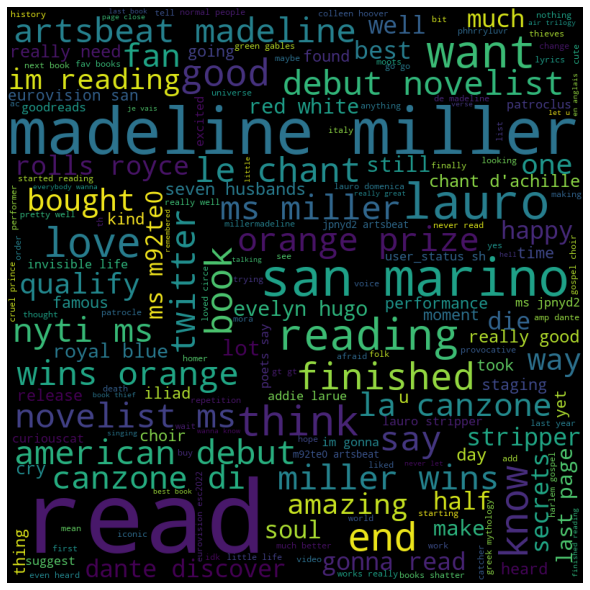

In [83]:
iow(df_achilles, ['achille', 'song', 'achilles','https','put'])

ici il est difficile de determiner le theme ou les mots clés pouvant identifier le livre 

In [129]:
stop_words = ["https","song","achille"] + nl + word
wl_df_achilles = list(df_achilles.renderedContent)
text_achilles = ''.join(map(str, wl_df_achilles))
tweets = text_achilles.lower().split()
tweets_words = [t for t in tweets if t not in stop_words]
get_n_grams(tweets_words)

                   words sequences  frequencies
12              (madeline, miller)          267
583             (debut, novelist,)          112
997      (prize:, american, debut)          112
2468      (madeline, miller, wins)          112
1174            ("the, achille...)          112
1824    (miller, "the, achille...)          112
5200                (miller, wins)          112
359             (prize:, american)          112
2901                (wins, orange)          112
5369  (american, debut, novelist,)          112
255        (debut, novelist,, ms.)          112
2375                 (ms., miller)          112
6447        (miller, wins, orange)          112
3689           (ms., miller, "the)          112
5806      (novelist,, ms., miller)          112
886         (wins, orange, prize:)          112
396              (american, debut)          112
3406              (orange, prize:)          112
2582    (orange, prize:, american)          112
599               (novelist,, ms.)      

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">4 - Analyse du livre "Batman : the Dark Night Return"</h3>
</div>

In [85]:
df_batman = pd.read_csv('twitter/batman.csv', delimiter="|")

In [164]:
df_batman["renderedContent"] = df_batman["renderedContent"].str.replace(r'@\S*', '', regex=True)
df_batman["renderedContent"] = df_batman["renderedContent"].str.replace('"', '', regex=True)
df_batman["renderedContent"] = df_batman["renderedContent"].str.replace('“', '', regex=True)
df_batman["renderedContent"] = df_batman["renderedContent"].str.replace(r'[^\w\s]', '',regex=True)
df_batman["renderedContent"] = df_batman["renderedContent"].str.replace('\n', '', regex=True)
df_batman["renderedContent"] = df_batman["renderedContent"].str.replace('🌟', '', regex=True)
df_batman["renderedContent"] = df_batman["renderedContent"].str.replace('!', '', regex=True)
df_batman["renderedContent"] = df_batman["renderedContent"].str.replace('https', '', regex=True)
df_batman["renderedContent"] = df_batman["renderedContent"].str.strip()
df_batman["renderedContent"] = df_batman["renderedContent"].str.lower()
df_batman["renderedContent"] = df_batman["renderedContent"].str.capitalize()
df_batman["renderedContent"]

0       Batman v supermanbatman beginsbatman the dark ...
1       Whats your favorite batman movie in the animat...
2       Hot take this batman wasok nolan verse was eh ...
3       In the dark knight returns book he talks about...
4       Aliens superman 2  batman returns the dark nig...
                              ...                        
4995    Just got and watched the new dccomics animated...
4996    Watching the new animated batman movie the dar...
4997    Will check it soon watched the animated the da...
4998    Time to watch batman the dark knight returns w...
4999    Nw batman the dark night returns anime its rea...
Name: renderedContent, Length: 5000, dtype: object

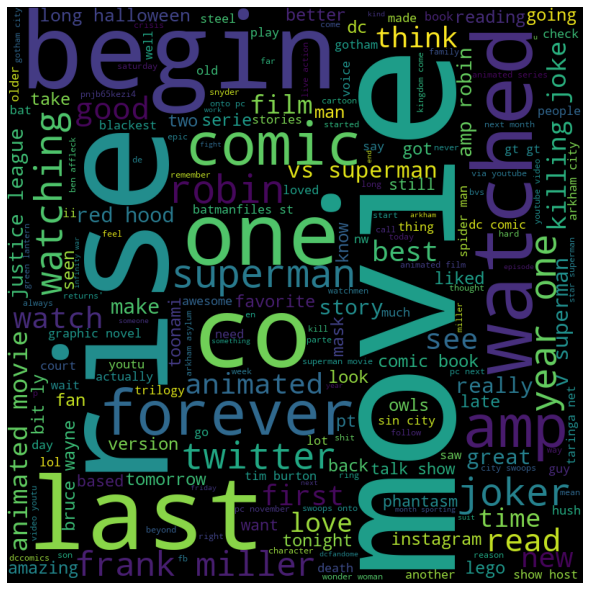

In [86]:
iow(df_batman, ['knight', 'batman', 'return','dark','night', 'returns', 'part', 'https'])

Ci dessus, nous remarquons que le theme de ce livre est sur "dc universe"

In [133]:
stop_words = ["dark","night","returns","batman","batman:","knight","part","1","2","night.","the"] + nl + word
wl_df_batman = list(df_batman.renderedContent)
text_batman = ''.join(map(str, wl_df_batman))
tweets = text_batman.lower().split()
tweets_words = [t for t in tweets if t not in stop_words]
get_n_grams(tweets_words)

                           words sequences  frequencies
24044                          (year, one)           95
16493                     ("the, returns")           83
13744                       (vs, superman)           67
26542                         (year, one,)           62
8289                           (red, hood)           60
12000                    (justice, league)           59
5806                      (mask, phantasm)           57
18027                         (talk, show)           57
30208                        (v, superman)           55
27703                      (frank, miller)           54
24021                    (animated, movie)           54
879                         (&amp;, robin)           52
19509                          (i-, first)           51
29633                    (frank, miller's)           49
22527                        (comic, book)           48
23651                     (killing, joke,)           46
16366                 (returns,, forever,)      

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">5 - Analyse du livre "The Picture of Dorian Gray"</h3>
</div>

In [88]:
df_gray = pd.read_csv('twitter/gray.csv', delimiter="|")

In [165]:
df_gray["renderedContent"] = df_gray["renderedContent"].str.replace(r'@\S*', '', regex=True)
df_gray["renderedContent"] = df_gray["renderedContent"].str.replace('"', '', regex=True)
df_gray["renderedContent"] = df_gray["renderedContent"].str.replace('“', '', regex=True)
df_gray["renderedContent"] = df_gray["renderedContent"].str.replace(r'[^\w\s]', '',regex=True)
df_gray["renderedContent"] = df_gray["renderedContent"].str.replace('\n', '', regex=True)
df_gray["renderedContent"] = df_gray["renderedContent"].str.replace('🌟', '', regex=True)
df_gray["renderedContent"] = df_gray["renderedContent"].str.replace('!', '', regex=True)
df_gray["renderedContent"] = df_gray["renderedContent"].str.replace('https', '', regex=True)
df_gray["renderedContent"] = df_gray["renderedContent"].str.strip()
df_gray["renderedContent"] = df_gray["renderedContent"].str.lower()
df_gray["renderedContent"] = df_gray["renderedContent"].str.capitalize()
df_gray["renderedContent"]

0           The picture of dorian gray 1890 tcoeuqvgcuasb
1       Anything by shirley jackson frankenstein and t...
2       This is the plot of a picture of dorian gray t...
3                     The picture of dorian gray november
4       First book for 2023 the picture of dorian gray...
                              ...                        
4995    Eleanor shaw in the manchurian candidate is fo...
4996    Have you ever seen her in the 1945 film of the...
4997    Gaslight 1944 and the picture of dorian gray 1...
4998    My introduction to ms lansbury was also with m...
4999    So many great performances a guilty pleasure o...
Name: renderedContent, Length: 5000, dtype: object

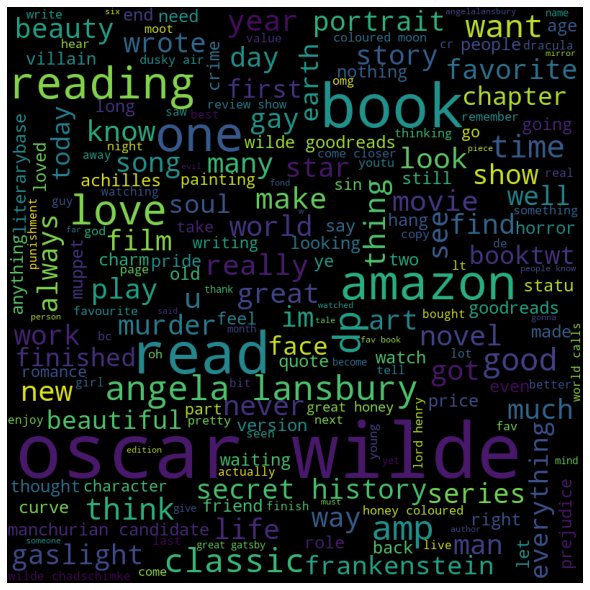

In [151]:
iow(df_gray, ['gray','dorian','picture',"gray'","https","co","twitter"])

Ici les mots du wordcloud tourne autour du theme : "drame"

In [146]:
stop_words = ["of","dorian","picture","the","gray","the","“the","gray”",'"the'] + nl + word
wl_df_gray = list(df_gray.renderedContent)
text_gray = ''.join(map(str, wl_df_gray))
tweets = text_gray.lower().split()
tweets_words = [t for t in tweets if t not in stop_words]
get_n_grams(tweets_words)

                      words sequences  frequencies
9150                   (oscar, wilde)          407
10218                 (oscar, wilde,)          227
85951                      (-, oscar)           97
53149              (angela, lansbury)           71
2445                   (gray,, oscar)           57
29013                   ('the, gray')           53
38255              (-, oscar, wilde,)           51
1796                       (—, oscar)           47
11279               (secret, history)           47
63078   (honey-coloured, moon, hangs)           45
74184          (dusky, air., waiting)           45
59630            (moon, hangs, dusky)           45
66420          (honey-coloured, moon)           45
61481                  (come, closer)           45
87075                  (hangs, dusky)           45
79396                   (dusky, air.)           45
37301              (her,, play, come)           45
67573          (come, closer, earth.)           45
95527             (charm, her,,

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">5 - Analyse du livre "The Book Thief"</h3>
</div>

In [96]:
df_thief = pd.read_csv('twitter/thief.csv', delimiter="|")

In [166]:
df_thief["renderedContent"] = df_thief["renderedContent"].str.replace(r'@\S*', '', regex=True)
df_thief["renderedContent"] = df_thief["renderedContent"].str.replace('"', '', regex=True)
df_thief["renderedContent"] = df_thief["renderedContent"].str.replace('“', '', regex=True)
df_thief["renderedContent"] = df_thief["renderedContent"].str.replace(r'[^\w\s]', '',regex=True)
df_thief["renderedContent"] = df_thief["renderedContent"].str.replace('\n', '', regex=True)
df_thief["renderedContent"] = df_thief["renderedContent"].str.replace('🌟', '', regex=True)
df_thief["renderedContent"] = df_thief["renderedContent"].str.replace('!', '', regex=True)
df_thief["renderedContent"] = df_thief["renderedContent"].str.replace('https', '', regex=True)
df_thief["renderedContent"] = df_thief["renderedContent"].str.strip()
df_thief["renderedContent"] = df_thief["renderedContent"].str.lower()
df_thief["renderedContent"] = df_thief["renderedContent"].str.capitalize()
df_thief["renderedContent"]

0                Oooooh did you enjoy the book thief then
1       The book thief single handedly the best book i...
2       Christianity16 influence by philip and hankuri...
3       Touhous political statement is the only ones w...
4                   The secret history and the book thief
                              ...                        
4995    All of them on earth were briefly gorgeous the...
4996    Aw i liked that one a lot its not the book thi...
4997    Havent touched the book thief for more than on...
4998                 I am almost done with the book thief
4999    At this weekend i plan to watch biographical d...
Name: renderedContent, Length: 5000, dtype: object

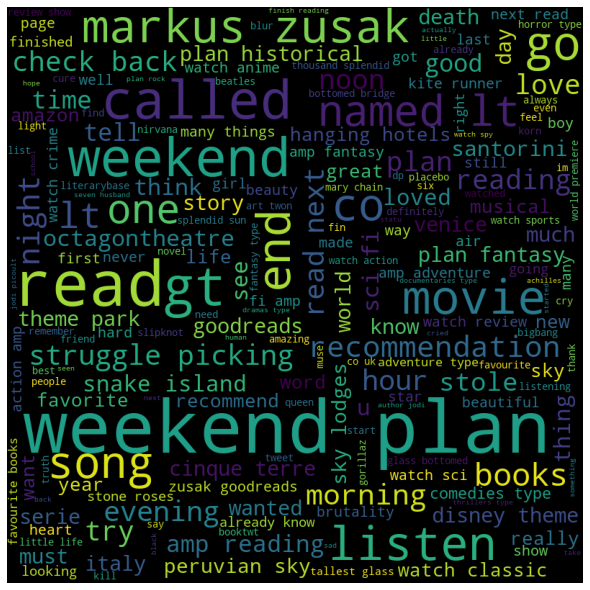

In [99]:
iow(df_thief, ["thief",'book','of',"twitter","https"])

pour finir ce wordcloud est plutôt flou, il faudrait mettre plus de stopwords pour le rendre plus précis 

In [148]:
stop_words = ["the","book","of","thief"] + nl + word
wl_df_thief = list(df_thief.renderedContent)
text_thief = ''.join(map(str, wl_df_thief))
tweets = text_thief.lower().split()
tweets_words = [t for t in tweets if t not in stop_words]
get_n_grams(tweets_words)

                     words sequences  frequencies
72600                (weekend, plan)         1532
75667                  (plan, watch)          766
69444              (called, weekend)          766
15186        (weekend,, plan, watch)          766
48908               (weekend,, plan)          766
10100        (called, weekend, plan)          766
43408           (&lt;the, thief&gt;)          765
60892                    (,, listen)          565
40439                 (thief&gt;, ,)          565
21402         (thief&gt;, ,, listen)          565
46589        (&lt;the, thief&gt;, ,)          565
76635             (songs., end,, go)          495
15942                 (songs., end,)          495
26763                     (end,, go)          495
38491                  (read, named)          472
57673             (movie,then, read)          472
5702              (type, movie,then)          472
56759      (movie,then, read, named)          472
2348        (type, movie,then, read)          472
